In [3]:
#st1 Step 1: Loading the Dataset
from google.colab import files
uploaded = files.upload()

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os

file_path = 'flipkart_reviews.csv'  # Update with your file's path

# Check if the file exists
if os.path.exists(file_path):
  data = pd.read_csv(file_path)
  data.head() # To see the output, run the code.
else:
  print(f"Error: File not found at {file_path}")
  print("Please check the file path and ensure the file exists.")

# Display first few rows
print(data.head())

Saving flipkart_reviews.csv to flipkart_reviews (1).csv
                                        Product_name  \
0  Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...   
1  Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...   
2  Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...   
3  DELL Inspiron Athlon Dual Core 3050U - (4 GB/2...   
4  DELL Inspiron Athlon Dual Core 3050U - (4 GB/2...   

                                              Review  Rating  
0  Best under 60k Great performanceI got it for a...       5  
1                                 Good perfomence...       5  
2  Great performance but usually it has also that...       5  
3           My wife is so happy and best product 👌🏻😘       5  
4  Light weight laptop with new amazing features,...       5  


In [4]:
#2nd Step 2: Data Preprocessing
# Check for null values
print(data.isnull().sum())

# Drop missing values
data = data.dropna()

# Check the shape of the dataset
print(data.shape)

# View column names
print(data.columns)

# Verify data types
print(data.dtypes)


Product_name    0
Review          0
Rating          0
dtype: int64
(2304, 3)
Index(['Product_name', 'Review', 'Rating'], dtype='object')
Product_name    object
Review          object
Rating           int64
dtype: object


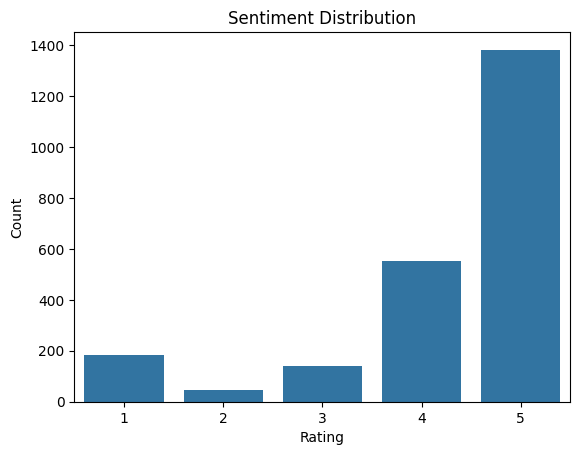

count    2304.000000
mean        4.259549
std         1.180017
min         1.000000
25%         4.000000
50%         5.000000
75%         5.000000
max         5.000000
Name: Rating, dtype: float64


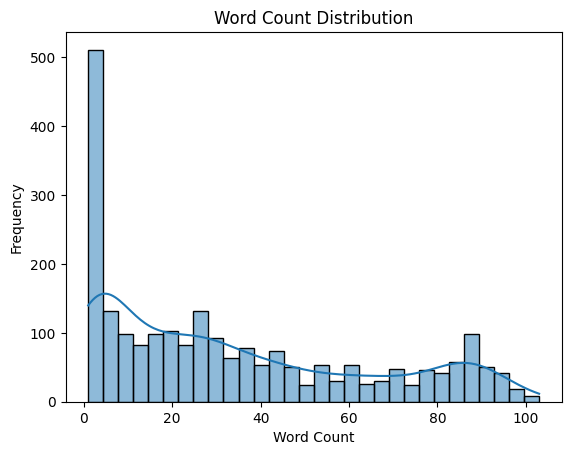

In [5]:
#3rd Step 3: Exploratory Data Analysis
# Distribution of Ratings
sns.countplot(x='Rating', data=data)
plt.title('Sentiment Distribution')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

# Statistical summary of Ratings
print(data['Rating'].describe())

# Visualize word count per review
data['Word_Count'] = data['Review'].apply(lambda x: len(str(x).split()))
sns.histplot(data['Word_Count'], bins=30, kde=True)
plt.title('Word Count Distribution')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.show()


In [8]:
#Step 4: Text Preprocessing
#Lemmatization
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
import nltk

# Downloaded required NLTK resources
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger')

# Initialized stop words and lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    # Removes URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)
    # Remove special characters
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
    # Convert to lowercase
    text = text.lower()
    # Tokenize and lemmatize
    text = ' '.join([lemmatizer.lemmatize(word, wordnet.VERB) for word in text.split() if word not in stop_words])
    return text

# Apply the cleaning function to the 'Review' column
data['Cleaned_Review'] = data['Review'].apply(clean_text)

# Tokenize the cleaned reviews
data['Tokens'] = data['Cleaned_Review'].apply(word_tokenize)

# Display the results
print(data[['Review', 'Cleaned_Review', 'Tokens']].head())

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


                                              Review  \
0  Best under 60k Great performanceI got it for a...   
1                                 Good perfomence...   
2  Great performance but usually it has also that...   
3           My wife is so happy and best product 👌🏻😘   
4  Light weight laptop with new amazing features,...   

                                      Cleaned_Review  \
0  best 60k great performancei get around 58500ba...   
1                                    good perfomence   
2  great performance usually also game laptops is...   
3                            wife happy best product   
4  light weight laptop new amaze feature battery ...   

                                              Tokens  
0  [best, 60k, great, performancei, get, around, ...  
1                                 [good, perfomence]  
2  [great, performance, usually, also, game, lapt...  
3                       [wife, happy, best, product]  
4  [light, weight, laptop, new, amaze, feature, b..

In [9]:
#5 Step 5: Feature Engineering
from sklearn.feature_extraction.text import TfidfVectorizer

# Convert text into numerical form using TF-IDF Vectorizer
vectorizer = TfidfVectorizer(max_features=1000)
X = vectorizer.fit_transform(data['Cleaned_Review']).toarray()
y = data['Rating']

print(f"Feature matrix shape: {X.shape}")


Feature matrix shape: (2304, 1000)


In [10]:
#6 Step 6: Splitting Data
from sklearn.model_selection import train_test_split

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape}, Testing set size: {X_test.shape}")

Training set size: (1843, 1000), Testing set size: (461, 1000)


In [11]:
#7 Step 7: Model Building
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

Accuracy: 0.83
Classification Report:
              precision    recall  f1-score   support

           1       0.92      0.89      0.90        37
           2       1.00      0.83      0.91         6
           3       1.00      0.42      0.59        24
           4       0.92      0.54      0.68       114
           5       0.80      0.98      0.88       280

    accuracy                           0.83       461
   macro avg       0.93      0.73      0.79       461
weighted avg       0.85      0.83      0.82       461



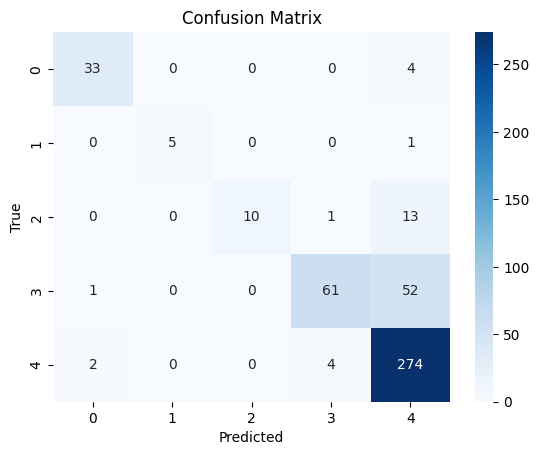

In [12]:
#8 Step 8: Evaluation and Results
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

# Predict sentiments
y_pred = model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
